Bjorn Larsen

In [18]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
from matplotlib import rcParams
rcParams["savefig.dpi"] = 300
rcParams["figure.dpi"] = 300
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

# Problem 1

Consider the integral
\begin{equation}
    \int_0^z\frac{dz}{[\Omega(1+z)^3 + (1 - \Omega)(1+z)^{3/2}]^{1/2}}
\end{equation}
where $\Omega$ is a parameter between 0 and 1. Note that this integral defines a function of $z$.

Write code to numerically integrate this integral for a given value of $\Omega$ and $z$. Plot the result as a function of $z$ (between $0 < z < 1$) for $\Omega = 0,0.3,0.7,1$. Make sure to label the axes of your plot.

Also include on your plot the analytic results for $\Omega = 0$ and $\Omega = 1$.

You can use any approach to integrate the function that you like (i.e. you do not need to write the integration routine from scratch).

### Solution

First the analytic results. For $\Omega = 0$ the integral becomes:
\begin{equation}
    \int_0^z\frac{dz}{(1+z)^{3/4}} = \int_1^{1+z}u^{-3/4}du = 4\left[(1+z)^{1/4} - 1\right]
\end{equation}
For $\Omega = 1$:
\begin{equation}
    \int_0^z\frac{dz}{(1+z)^{3/2}} = \int_1^{1+z}u^{-3/2}du = -2\left[(1+z)^{-1/2} - 1\right]
\end{equation}

In [30]:
z = np.arange(0, 1, 0.01)+0.01
soln_0 = 4*((1 + z)**(1/4) - 1)
soln_1 = -2*((1 + z)**(-1/2) - 1)

Integrate numerically using `spi.quad`:

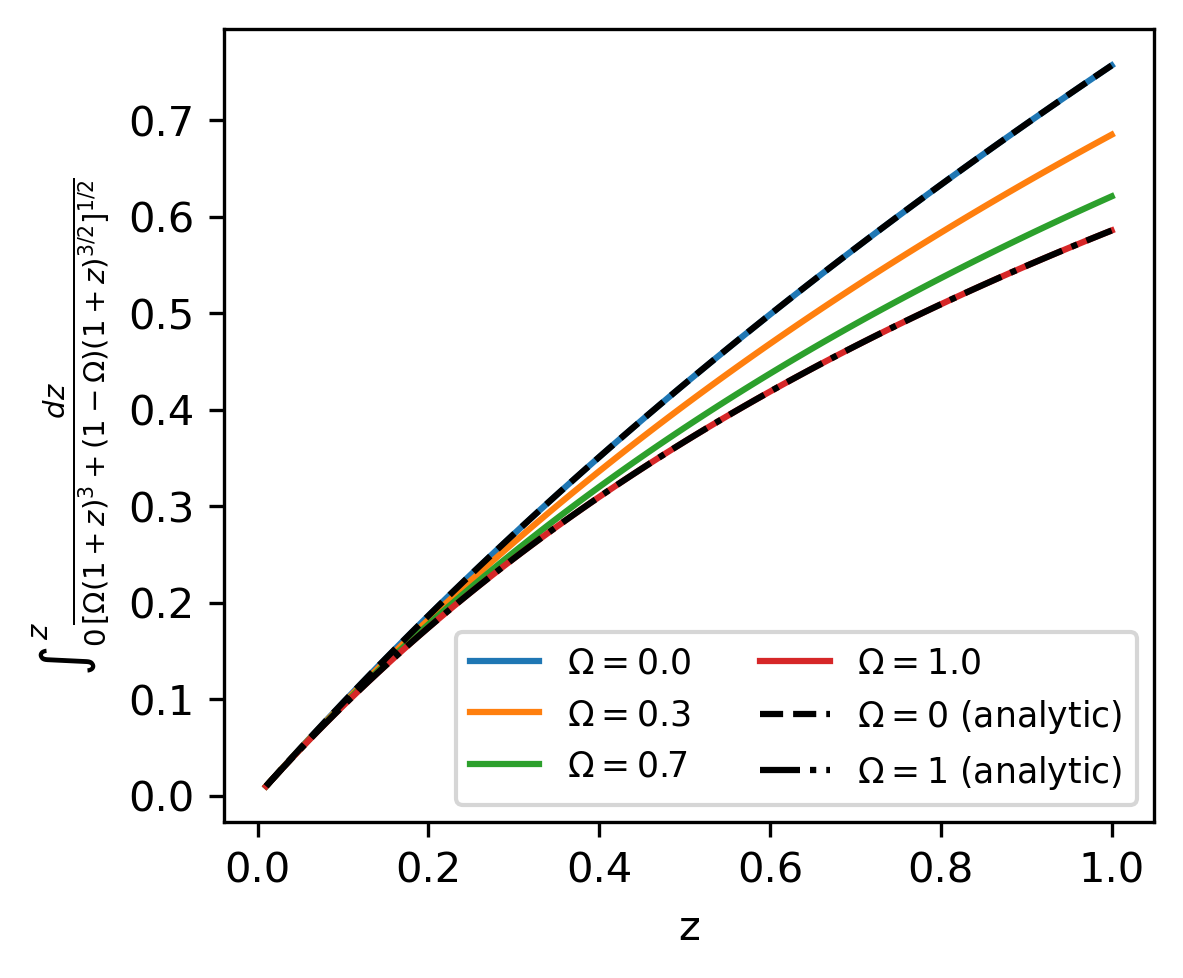

In [39]:
def integrand(z, Omega):
    return (Omega*(1 + z)**3 + (1 - Omega)*(1 + z)**(3/2))**(-1/2)

Omegas = np.array([0,0.3,0.7,1])
solns = np.zeros((4,len(z)))

plt.figure(figsize=(4,3.5))
for i in range(4):
    for j in range(len(z)):
        solns[i, j] = spi.quad(integrand, 0, z[j], args=(Omegas[i]))[0]
    plt.plot(z, solns[i], label=r'$\Omega = $'+str(Omegas[i]))
plt.plot(z, soln_0, '--k', label=r'$\Omega = 0$ (analytic)')
plt.plot(z, soln_1, '-.k', label=r'$\Omega = 1$ (analytic)')
plt.xlabel('z')
plt.ylabel(r'$\int_0^z\frac{dz}{[\Omega(1+z)^3 + (1 - \Omega)(1+z)^{3/2}]^{1/2}}$')
plt.legend(ncol=2, fontsize='small')
plt.savefig('./hw1_solutions.png', format='png', bbox_inches='tight',
            dpi=600, facecolor="w")
plt.show()